In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# 1. Importing Libraries

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Dense,Flatten
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img,array_to_img
import matplotlib.pyplot as plt 

# 2. Loading Dataset

In [76]:
train_data = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_data = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [77]:
y_train = train_data['label']
X_train = train_data.drop('label',axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [78]:
y_test = test_data['label']
X_test = test_data.drop('label',axis=1)
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [79]:
X_train = np.array(X_train).reshape((27455,28,28,1))

In [80]:
X_test = np.array(X_test).reshape((7172,28,28,1))

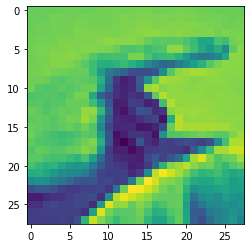

In [81]:
plt.imshow(X_test[0])

In [82]:
y_test[0]

6

In [83]:
X_train.shape

(27455, 28, 28, 1)

In [84]:
X_train[0].shape

(28, 28, 1)

In [85]:
numOfClass = len(pd.DataFrame(y_train)['label'].unique())
numOfClass

24

# 3.Building CNN Model

In [86]:
# CNN Model

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=X_train[0].shape))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024)) 
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Activation('softmax'))

In [87]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
print('ended')

ended


# 4. Training The Model

In [88]:
batch_size =32

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.1,
                                  zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [89]:
train_generator = train_datagen.flow(X_train,y_train,
                                     batch_size=batch_size)
test_generator = test_datagen.flow(X_test,y_test)

In [90]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [91]:
y_test.shape

(7172,)

In [92]:
hist=model.fit_generator(train_generator,
                   steps_per_epoch=27455//batch_size,
                   epochs=60,
                   validation_data=test_generator)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
857/857 [==============================] - 19s 21ms/step - loss: 2.0787 - accuracy: 0.3367 - val_loss: 0.9884 - val_accuracy: 0.6447
Epoch 2/60
857/857 [==============================] - 18s 22ms/step - loss: 0.7536 - accuracy: 0.7410 - val_loss: 0.5320 - val_accuracy: 0.8069
Epoch 3/60
857/857 [==============================] - 18s 21ms/step - loss: 0.3478 - accuracy: 0.8816 - val_loss: 0.3747 - val_accuracy: 0.8922
Epoch 4/60
857/857 [==============================] - 19s 22ms/step - loss: 0.1846 - accuracy: 0.9374 - val_loss: 0.2324 - val_accuracy: 0.9274
Epoch 5/60
857/857 [==============================] - 18s 21ms/step - loss: 0.1228 - accuracy: 0.9592 - val_loss: 0.3191 - val_accuracy: 0.8893
Epoch 6/60
857/857 [==============================] - 18s 21ms/step - loss: 0.0866 - accuracy: 0.9714 - val_loss: 0.3450 - val_accuracy: 0.9113
Epoch 7/60
857/857 [==============================] - 19s 22ms/step - loss: 0.0698 - accuracy: 0.9769 - val_loss: 0.4281 - val_accuracy:

# 5. Model Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


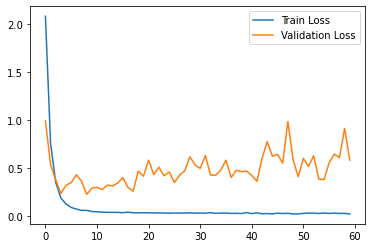

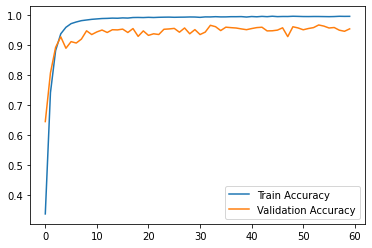

In [93]:
print(hist.history.keys())
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.legend()
plt.figure()
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

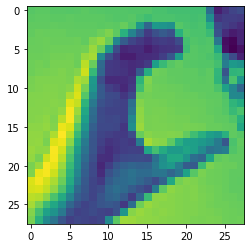

In [94]:
plt.imshow(X_train[2])

In [95]:
y_train[2]

2

In [96]:
predict = model.predict(X_train[2].reshape((1,28,28,1)))
print("Model's Prediction is : "+ str(np.argmax(predict.astype('int'))))

Model's Prediction is : 2
